In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
y_true = (0.5 * x_data) + 5 +noise

In [5]:
y_true

array([ 5.71074996,  3.53833575,  5.68694193, ..., 10.7884414 ,
        9.94663737,  9.15160413])

In [6]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])

In [7]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [8]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [9]:
my_data = pd.concat([x_df,y_df], axis=1)

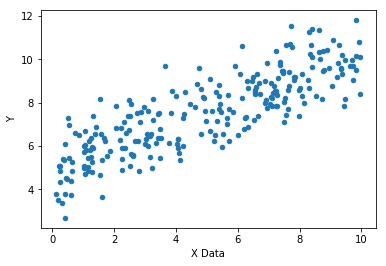

In [10]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

In [11]:
batch_size = 8

In [12]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [13]:
x_ph = tf.placeholder(tf.float32, [batch_size])

In [14]:
y_ph = tf.placeholder(tf.float32, [batch_size])

In [15]:
y_model = m * x_ph + b

In [16]:
error = tf.reduce_sum(tf.square(y_ph-y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [18]:
init = tf.global_variables_initializer()

In [19]:
rand_ind = np.random.randint(len(x_data), size = batch_size)
rand_ind

array([391871, 554611, 335605,  66761, 962986, 531806, 511532, 662427])

In [20]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        feed = {x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [21]:
model_m

0.5398914

In [22]:
model_b

4.891973

In [23]:
y_hat = x_data * model_m + model_b

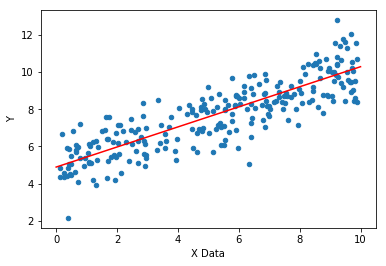

In [24]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat, 'r')

# TF ESTIMATOR

In [25]:
feat_cols = [ tf.feature_column.numeric_column(key='x', shape=[1]) ]

In [26]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ASUSPC~1\\AppData\\Local\\Temp\\tmpntbkc1wu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001967B4ABF60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [29]:
x_train.shape

(700000,)

In [30]:
x_eval.shape

(300000,)

In [31]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8,num_epochs=None,shuffle= True)

In [32]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8,num_epochs=1000,shuffle= False)

In [33]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=8,num_epochs=1000,shuffle= False)

In [34]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ASUSPC~1\AppData\Local\Temp\tmpntbkc1wu\model.ckpt.
INFO:tensorflow:loss = 434.08014, step = 1
INFO:tensorflow:global_step/sec: 289.79
INFO:tensorflow:loss = 16.450184, step = 101 (0.347 sec)
INFO:tensorflow:global_step/sec: 430.332
INFO:tensorflow:loss = 46.139328, step = 201 (0.234 sec)
INFO:tensorflow:global_step/sec: 399.472
INFO:tensorflow:loss = 15.688439, step = 301 (0.251 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 26.86569, step = 401 (0.197 sec)
INFO:tensorflow:global_step/sec: 625.165
INFO:tensorflow:loss = 3.6462283, step = 501 (0.159 sec)
INFO:tensorflow:global_step/sec: 642.739
INFO:tensorflow:loss = 11.509301, step = 601 (0.156 sec)
INFO:tensorflow:global_step

In [36]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-04:53:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpntbkc1wu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-25-04:53:52
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.050417, global_step = 1000, loss = 8.403336


In [37]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-04:54:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpntbkc1wu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-25-04:54:31
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1064738, global_step = 1000, loss = 8.85179


In [39]:
print('train data metrics')
print(train_metrics)

train data metrics
{'average_loss': 1.050417, 'loss': 8.403336, 'global_step': 1000}


In [40]:
print('eval data metrics')
print(eval_metrics)

eval data metrics
{'average_loss': 1.1064738, 'loss': 8.85179, 'global_step': 1000}


In [41]:
brand_new_data = np.linspace(0,10,10)

In [42]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [44]:
list(estimator.predict(input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpntbkc1wu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4467306], dtype=float32)},
 {'predictions': array([5.09689], dtype=float32)},
 {'predictions': array([5.7470493], dtype=float32)},
 {'predictions': array([6.397209], dtype=float32)},
 {'predictions': array([7.0473685], dtype=float32)},
 {'predictions': array([7.697528], dtype=float32)},
 {'predictions': array([8.347687], dtype=float32)},
 {'predictions': array([8.997847], dtype=float32)},
 {'predictions': array([9.648006], dtype=float32)},
 {'predictions': array([10.298166], dtype=float32)}]

In [45]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpntbkc1wu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [46]:
predictions

[array([4.4467306], dtype=float32),
 array([5.09689], dtype=float32),
 array([5.7470493], dtype=float32),
 array([6.397209], dtype=float32),
 array([7.0473685], dtype=float32),
 array([7.697528], dtype=float32),
 array([8.347687], dtype=float32),
 array([8.997847], dtype=float32),
 array([9.648006], dtype=float32),
 array([10.298166], dtype=float32)]

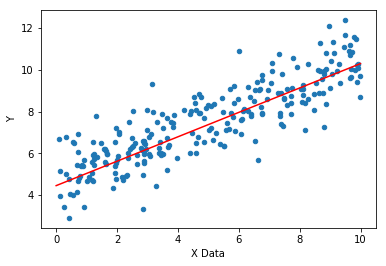

In [47]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(brand_new_data, predictions,'r')